## Pandas Series

In [1]:
import pandas as pd
import numpy as np

data = np.array(['a','b','c','d', 'e'])
# {10: 'a', }
series = pd.Series(data, index=[10, 11, 12, 13, 14])

print(series)

10    a
11    b
12    c
13    d
14    e
dtype: object


In [2]:
series[12]

'c'

In [5]:
series.drop(12, inplace=True)

In [6]:
series

10    a
11    b
13    d
14    e
dtype: object

In [12]:
series = series.append(pd.Series(['g'], index=[16]))

In [13]:
series.sum()

'abdeg'

In [9]:
'String1' + 'String2'

'String1String2'

In [14]:
series*2

10    aa
11    bb
13    dd
14    ee
16    gg
dtype: object

In [15]:
print(pd.Series(9, index=[1, 2, 3, 4]))

1    9
2    9
3    9
4    9
dtype: int64


In [16]:
dictionary = {'r' : 'red', 'b':'blue', 'g':'green'}

colors = pd.Series(dictionary)
print(colors)

r      red
b     blue
g    green
dtype: object


In [17]:
print(colors['r'])

red


## Creating Pandas DataFrame

In [18]:
import pandas as pd

list1 = ['red', 'blue', 'green', 'yellow']

df = pd.DataFrame(list1, columns=['colors'])
print(df)

   colors
0     red
1    blue
2   green
3  yellow


In [19]:

data = {'Name':['Tom', 'Jack', 'Matt', 'Michael'],
        'Age':[31, 21, 19, 18]}

df = pd.DataFrame(data)
print(df)

      Name  Age
0      Tom   31
1     Jack   21
2     Matt   19
3  Michael   18


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Name    4 non-null object
Age     4 non-null int64
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [21]:
df.set_index('Name', inplace=True)

In [22]:
df

,Age
Name,
Tom,31
Jack,21
Matt,19
Michael,18


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Tom to Michael
Data columns (total 1 columns):
Age    4 non-null int64
dtypes: int64(1)
memory usage: 64.0+ bytes


In [24]:
df['Age'] > 20

Name
Tom         True
Jack        True
Matt       False
Michael    False
Name: Age, dtype: bool

In [25]:
df[df['Age'] > 20]

,Age
Name,
Tom,31
Jack,21


In [26]:
df['Country'] = np.array(['POL', 'USA', 'POL', 'GBR'])

In [27]:
df

,Age,Country
Name,,
Tom,31,POL
Jack,21,USA
Matt,19,POL
Michael,18,GBR


In [28]:
dga = pd.pivot_table(df, values='Age', index='Name', columns=['Country'])
dga

Country,GBR,POL,USA
Name,,,
Jack,NaN,NaN,21.0
Matt,NaN,19.0,NaN
Michael,18.0,NaN,NaN
Tom,NaN,31.0,NaN


In [31]:
np.float('inf') - np.float('inf')

nan

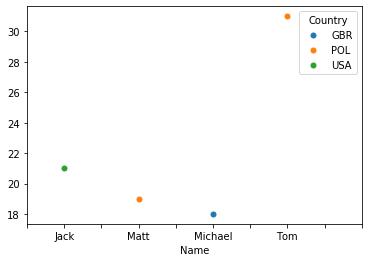

In [30]:
dga.plot(style='.', markersize=10, xlim=(-0.5, len(set(dga['POL']))))

In [32]:
df['Country'] = ['USA', 'UK', 'Canada', 'Poland']
print(df)

         Age Country
Name                
Tom       31     USA
Jack      21      UK
Matt      19  Canada
Michael   18  Poland


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Tom to Michael
Data columns (total 2 columns):
Age        4 non-null int64
Country    4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [34]:
df['Age'] = df['Age'].astype(str)

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Tom to Michael
Data columns (total 2 columns):
Age        4 non-null object
Country    4 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes
None


In [37]:
df['Age']['Tom']

'31'

In [41]:
print(df.loc['Tom':'Matt','Age'])

Name
Tom     31
Jack    21
Matt    19
Name: Age, dtype: object


In [42]:
df.iloc[1, :]

Age        21
Country    UK
Name: Jack, dtype: object

In [40]:
print(df)

        Age Country
Name               
Tom      31     USA
Jack     21      UK
Matt     19  Canada
Michael  18  Poland


In [43]:
for i, j in df.iterrows():
    print('Index: ',i)
    print(j)
    print()

Index:  Tom
Age         31
Country    USA
Name: Tom, dtype: object

Index:  Jack
Age        21
Country    UK
Name: Jack, dtype: object

Index:  Matt
Age            19
Country    Canada
Name: Matt, dtype: object

Index:  Michael
Age            18
Country    Poland
Name: Michael, dtype: object



In [48]:
columns = list(df)
 
for i in columns:
    #print(i)
    print(df[i][2])

19
Canada


### Missing values

In [49]:
missing_values = {'First Score':[100, 90, np.nan, 95], 
        'Second Score': [30, 45, 56, np.nan], 
        'Third Score':[np.nan, 40, 80, 98]} 

df = pd.DataFrame(missing_values) 

In [50]:
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [57]:
#print(df.fillna(-999)) # inplace=True
print(df.fillna(method='pad'))
# df.fillna(method='backfill')

#print(df)

   First Score  Second Score  Third Score
0        100.0          30.0          NaN
1         90.0          45.0         40.0
2         90.0          56.0         80.0
3         95.0          56.0         98.0


In [58]:
df.replace(to_replace = np.nan, value = -99)  

,First Score,Second Score,Third Score
0,100.0,30.0,-99.0
1,90.0,45.0,40.0
2,-99.0,56.0,80.0
3,95.0,-99.0,98.0


In [59]:
df.interpolate(method ='linear', limit_direction ='forward') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,56.0,98.0


In [60]:
df.dropna(how='any')

,First Score,Second Score,Third Score
1,90.0,45.0,40.0


In [61]:
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


## Importing from CSV file

In [71]:
import pandas as pd

filename = 'olympics.csv' 

df = pd.read_csv(filename,index_col=0, skiprows=1, encoding='utf8')

print(df.tail(2))

                        № Summer  01 !  02 !  03 !  Total  № Winter  01 !.1  \
Mixed team (ZZX) [ZZX]         3     8     5     4     17         0       0   
Totals                        27  4809  4775  5130  14714        22     959   

                        02 !.1  03 !.1  Total.1  № Games  01 !.2  02 !.2  \
Mixed team (ZZX) [ZZX]       0       0        0        3       8       5   
Totals                     958     948     2865       49    5768    5733   

                        03 !.2  Combined total  
Mixed team (ZZX) [ZZX]       4              17  
Totals                    6078           17579  


In [72]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [ ]:
print(df.tail(3))

In [73]:
print(df.count()) # df['01 !'].count()

№ Summer          147
01 !              147
02 !              147
03 !              147
Total             147
№ Winter          147
01 !.1            147
02 !.1            147
03 !.1            147
Total.1           147
№ Games           147
01 !.2            147
02 !.2            147
03 !.2            147
Combined total    147
dtype: int64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan (AFG) to Totals
Data columns (total 15 columns):
№ Summer          147 non-null int64
01 !              147 non-null int64
02 !              147 non-null int64
03 !              147 non-null int64
Total             147 non-null int64
№ Winter          147 non-null int64
01 !.1            147 non-null int64
02 !.1            147 non-null int64
03 !.1            147 non-null int64
Total.1           147 non-null int64
№ Games           147 non-null int64
01 !.2            147 non-null int64
02 !.2            147 non-null int64
03 !.2            147 non-null int64
Combined total    147 non-null int64
dtypes: int64(15)
memory usage: 18.4+ KB


In [75]:
df.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [76]:
new_columns = ("summer_participations",
               "summer_gold",
               "summer_silver",
               "summer_bronze",
               "summer_total",
               "winter_participations",
               "winter_gold",
               "winter_silver",
               "winter_bronze",
               "winter_total",
               "total_participations",
               "total_gold",
               "total_silver",
               "total_bronze",
               "total_combined")

old_columns = list(df.columns)
df = df.rename(index=str, columns={old_columns[i]:new_columns[i] for i in range(len(old_columns))})

In [77]:
print(df.head(2))

                   summer_participations  summer_gold  summer_silver  \
Afghanistan (AFG)                     13            0              0   
Algeria (ALG)                         12            5              2   

                   summer_bronze  summer_total  winter_participations  \
Afghanistan (AFG)              2             2                      0   
Algeria (ALG)                  8            15                      3   

                   winter_gold  winter_silver  winter_bronze  winter_total  \
Afghanistan (AFG)            0              0              0             0   
Algeria (ALG)                0              0              0             0   

                   total_participations  total_gold  total_silver  \
Afghanistan (AFG)                    13           0             0   
Algeria (ALG)                        15           5             2   

                   total_bronze  total_combined  
Afghanistan (AFG)             2               2  
Algeria (ALG)       

In [78]:
df.loc["Poland (POL)"]

KeyError: 'Poland (POL)'

In [79]:
df.index

Index(['Afghanistan (AFG)', 'Algeria (ALG)', 'Argentina (ARG)',
       'Armenia (ARM)', 'Australasia (ANZ) [ANZ]', 'Australia (AUS) [AUS] [Z]',
       'Austria (AUT)', 'Azerbaijan (AZE)', 'Bahamas (BAH)', 'Bahrain (BRN)',
       ...
       'Uzbekistan (UZB)', 'Venezuela (VEN)', 'Vietnam (VIE)',
       'Virgin Islands (ISV)', 'Yugoslavia (YUG) [YUG]',
       'Independent Olympic Participants (IOP) [IOP]', 'Zambia (ZAM) [ZAM]',
       'Zimbabwe (ZIM) [ZIM]', 'Mixed team (ZZX) [ZZX]', 'Totals'],
      dtype='object', length=147)

In [80]:
df.index[['Pol' in s for s in df.index]]

Index(['Poland (POL)'], dtype='object')

In [ ]:
df.index[0]

In [87]:
print('\xa0')

In [88]:
df.index = df.index.to_series().apply(lambda x: x.replace('\xa0', " "))

In [89]:
df.index = df.index.astype(str)

In [90]:
df.index

Index(['Afghanistan (AFG)', 'Algeria (ALG)', 'Argentina (ARG)',
       'Armenia (ARM)', 'Australasia (ANZ) [ANZ]', 'Australia (AUS) [AUS] [Z]',
       'Austria (AUT)', 'Azerbaijan (AZE)', 'Bahamas (BAH)', 'Bahrain (BRN)',
       ...
       'Uzbekistan (UZB)', 'Venezuela (VEN)', 'Vietnam (VIE)',
       'Virgin Islands (ISV)', 'Yugoslavia (YUG) [YUG]',
       'Independent Olympic Participants (IOP) [IOP]', 'Zambia (ZAM) [ZAM]',
       'Zimbabwe (ZIM) [ZIM]', 'Mixed team (ZZX) [ZZX]', 'Totals'],
      dtype='object', length=147)

In [91]:
df.loc['Poland (POL)']

summer_participations     20
summer_gold               64
summer_silver             82
summer_bronze            125
summer_total             271
winter_participations     22
winter_gold                6
winter_silver              7
winter_bronze              7
winter_total              20
total_participations      42
total_gold                70
total_silver              89
total_bronze             132
total_combined           291
Name: Poland (POL), dtype: int64

In [92]:
df.describe()

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participations,total_gold,total_silver,total_bronze,total_combined
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,13.476190,65.428571,64.965986,69.795918,200.190476,6.700680,13.047619,13.034014,12.897959,38.979592,20.176871,78.476190,78.000000,82.693878,239.170068
std,7.072359,405.549990,399.309960,427.187344,1231.306297,7.433186,80.799204,80.634421,79.588388,240.917324,13.257048,485.013378,478.860334,505.855110,1469.067883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.500000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,7.000000,12.000000
75%,18.500000,24.000000,28.000000,29.000000,86.000000,10.000000,1.000000,2.000000,1.000000,5.000000,27.000000,25.500000,29.000000,32.500000,89.000000
max,27.000000,4809.000000,4775.000000,5130.000000,14714.000000,22.000000,959.000000,958.000000,948.000000,2865.000000,49.000000,5768.000000,5733.000000,6078.000000,17579.000000


In [93]:
names = df.index.str.split(' \(')

df.index = names.str[0]
df['ID'] = names.str[1].str[:3]



# df.head(1)

In [94]:
df.tail()

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participations,total_gold,total_silver,total_bronze,total_combined,ID
Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,IOP
Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,ZAM
Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,ZIM
Mixed team,3,8,5,4,17,0,0,0,0,0,3,8,5,4,17,ZZX
Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,NaN


In [95]:
import pycountry_convert as pc

country_code = pc.country_name_to_country_alpha2("Poland", cn_name_format="default")
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)

EU


In [96]:
countries_code = []

for country in df.index:
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        
        countries_code.append(continent_name)
    except KeyError:
        countries_code.append("Others")
df['Continent'] = countries_code

In [97]:
df.head()

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participations,total_gold,total_silver,total_bronze,total_combined,ID,Continent
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG,AS
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG,AF
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG,SA
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM,AS
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ,Others


In [98]:
df.loc['United States']

summer_participations      26
summer_gold               976
summer_silver             757
summer_bronze             666
summer_total             2399
winter_participations      22
winter_gold                96
winter_silver             102
winter_bronze              84
winter_total              282
total_participations       48
total_gold               1072
total_silver              859
total_bronze              750
total_combined           2681
ID                        USA
Continent                  NA
Name: United States, dtype: object

In [99]:
name = 'new_olympics.csv'

df.to_csv(name)

## Calculate statistics

In [104]:
# Maximum number of medals

df_change1 = df.loc[[ind for ind in df.index if 'Totals' not in ind]]

# print(df_change1.tail())
df_change1[df_change1['total_combined'] == df_change1['total_combined'].max()]
#df[df['total_combined'] == df['total_combined'].max()]

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participations,total_gold,total_silver,total_bronze,total_combined,ID,Continent
United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,USA,NA


In [105]:
print(df_change1.mean())

summer_participations     13.383562
summer_gold               32.938356
summer_silver             32.705479
summer_bronze             35.136986
summer_total             100.780822
winter_participations      6.595890
winter_gold                6.568493
winter_silver              6.561644
winter_bronze              6.493151
winter_total              19.623288
total_participations      19.979452
total_gold                39.506849
total_silver              39.267123
total_bronze              41.630137
total_combined           120.404110
dtype: float64


In [106]:
df_change1.describe()

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participations,total_gold,total_silver,total_bronze,total_combined
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,13.383562,32.938356,32.705479,35.136986,100.780822,6.595890,6.568493,6.561644,6.493151,19.623288,19.979452,39.506849,39.267123,41.630137,120.404110
std,7.006657,96.745184,80.648421,77.118416,252.700436,7.349012,18.975086,18.606996,17.499654,54.640914,13.084062,109.932471,93.984393,89.826117,291.988913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.250000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,6.500000,12.000000
75%,18.000000,23.000000,26.750000,28.750000,85.250000,10.000000,0.750000,1.750000,1.000000,4.750000,26.000000,24.500000,28.000000,29.000000,87.750000
max,27.000000,976.000000,757.000000,666.000000,2399.000000,22.000000,118.000000,111.000000,100.000000,329.000000,49.000000,1072.000000,859.000000,750.000000,2681.000000


In [107]:
df_change1[df_change1['summer_participations'] == 5]['ID'].count()

17

In [108]:
df_change1.groupby(['summer_participations']).size()

summer_participations
1      3
2      2
3      6
4      1
5     17
6      3
7      1
8      7
9      8
10     2
11     7
12    10
13    13
14     5
15     8
16    11
17     4
18     2
19     3
20     5
21     4
22     5
23     3
24     2
25     5
26     5
27     4
dtype: int64

In [109]:
print(df_change1.columns)

Index(['summer_participations', 'summer_gold', 'summer_silver',
       'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold',
       'winter_silver', 'winter_bronze', 'winter_total',
       'total_participations', 'total_gold', 'total_silver', 'total_bronze',
       'total_combined', 'ID', 'Continent'],
      dtype='object')


In [111]:
df_change1.sort_values(by=['total_gold'], ascending=False)['total_gold'].head(10)

United States    1072
Soviet Union      473
Germany           252
Great Britain     246
Italy             235
France            233
China             213
Sweden            193
East Germany      192
Russia            181
Name: total_gold, dtype: int64

In [112]:
# Which country had the biggest difference between their summer and winter participations?

(df_change1['summer_participations'] - df_change1['winter_participations']).abs().idxmax()

'Egypt'

In [113]:
df_change1.loc['Egypt',['summer_participations', 'winter_participations']]

summer_participations    21
winter_participations     1
Name: Egypt, dtype: object

In [114]:
df.groupby('total_participations')[['total_gold', 'total_silver']].agg(['sum', 'max'])

total_gold       total_silver      
                            sum   max          sum   max
total_participations                                    
1                             0     0            1     1
2                            57    54           48    44
3                             9     8           10     5
4                             0     0            1     1
5                             2     1            2     2
6                            38    36           68    60
7                             0     0            0     0
8                             2     1            0     0
9                             1     1            4     1
10                            6     6            6     5
11                          554   192          535   165
12                            1     1            9     3
13                           26    10           33    13
14                           32    21           26    10
15                           13     5           15     8
16                           32    25           39    32
17                           14    14           13    13
18                          483   473          387   376
19                          297   213          256   168
20                           17    13           27    15
21                            5     2            5     2
22                            7     7            9     9
23                           17    17           32    30
24                           25    23           35    26
25                           17    15           29    20
26                          261   252          268   260
28                           23    23           30    30
30                           44    26           64    32
32                           60    51           65    57
33                          107   107           99    99
34                            2     2            2     2
36                            0     0            2     2
37                           81    42           44    25
38                           54    52           94    87
39                           43    43           69    69
40                           88    88           94    94
41                          196   140          226   143
42                           70    70           89    89
43                          144   144          155   155
45                          182   114          218   123
46                          317   174          306   160
47                          288   167          301   155
48                         1577  1072         1374   859
49                         6344  5768         6376  5733

In [115]:
df.index.name = 'Country'

In [116]:
def change_to_percent(series):
    df = pd.DataFrame({'percent of gold': series['total_gold']/series['total_combined'],
                      'percent of silver': series['total_silver']/series['total_combined'],
                      'percent of bronze': series['total_bronze']/series['total_combined']},
                      index=series.index)
    return df

In [117]:
df.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australasia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       ...
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Virgin Islands', 'Yugoslavia',
       'Independent Olympic Participants', 'Zambia', 'Zimbabwe', 'Mixed team',
       'Totals'],
      dtype='object', name='Country', length=147)

In [118]:
df.groupby('ID').apply(change_to_percent)

,percent of gold,percent of silver,percent of bronze
Country,,,
Afghanistan,0.000000,0.000000,1.000000
Algeria,0.333333,0.133333,0.533333
Argentina,0.257143,0.342857,0.400000
Armenia,0.083333,0.166667,0.750000
Australasia,0.250000,0.333333,0.416667
Australia,0.300000,0.322917,0.377083
Austria,0.253289,0.365132,0.381579
Azerbaijan,0.230769,0.192308,0.576923
Bahamas,0.416667,0.166667,0.416667


In [ ]:
df.groupby('Continent')['summer_participations'].count().sort_values(ascending=False)

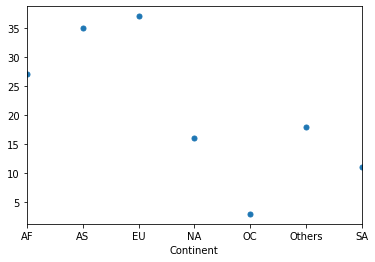

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby('Continent')['summer_participations'].count().plot(style='.', markersize=10)

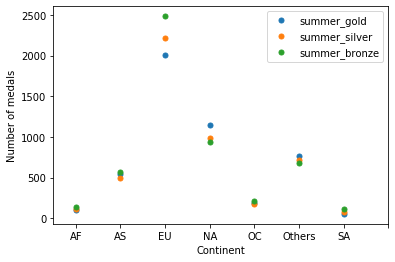

In [120]:
df_change1.groupby('Continent')[['summer_gold', 'summer_silver',\
                                 'summer_bronze']].sum().plot(style='.',\
                                markersize=10, xlim=(-0.5, len(set(df_change1['Continent']))))
# plt.axis('tight')
plt.ylabel('Number of medals');

In [ ]:
df_change1.groupby('Continent')[['summer_gold', 'summer_silver', 'summer_bronze']].sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000242BB25BB00>,
      dtype=object)

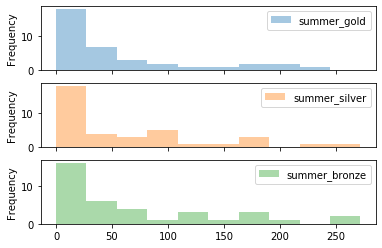

In [121]:
bool_continent = df_change1['Continent'] == 'EU'
df_change1[bool_continent][['summer_gold', 'summer_silver', \
                            'summer_bronze']].plot(kind='hist',alpha=0.4, subplots=True)

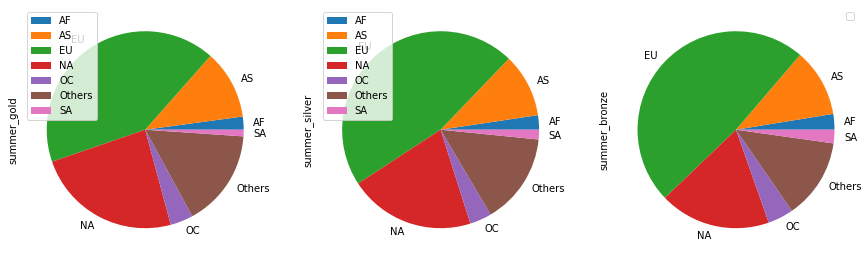

In [124]:
bool_continent = df_change1['Continent'] == 'NA'
df_change1[['summer_gold', 'summer_silver', \
                            'summer_bronze', 'Continent']].groupby('Continent').sum().plot(kind='pie', subplots=True, figsize=(15,15))
plt.legend([])

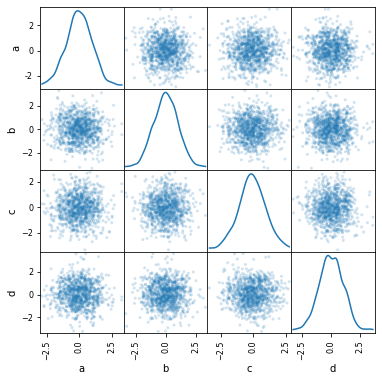

In [125]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

## More in pandas documentation

# Exercises

1. Read data from file 'summer.csv'.
2. Using .info(), .head(), .tail() methods inspect your DataFrame.
3. What is the size of your DataFrame.
4. Check if there are any values NaN in your data frame. If so, print the whole rows containing NaN value.
5. In columns 'Athlete' replace all values 'Pending' for 'No data'.
6. Change the last name format of each athletes. The last name should start with a capital letter and the rest letters in last name should be small.
7. Create a new column 'Points' with the value 10 if the value of column 'Medal' for this row is "Gold", 7 if the value of column 'Medal' for this row is "Silver" and 3 otherwise.
8. In which discipline did China win the most medals?
9. What disciplines were at the summer Olympics in 1900?
10. Which athlete won the most medals in the history of the Summer Olympic Games?
11. What events most often appeared at the Summer Olympic Games? Difficult!
12. What country has won the most medals in swimming?
13. Try to come up with their own questions about the Summer Olympic Games data and answer them.
14. Plot the number of medals won by Polish team during the Summer Olympic Games in 1896-2012. Values for different medals should be marked with a different color. Use 'style="o"' in plot method.
15. Plot a histograms of medals won by Poland during the Summer Olympic Games in 1896-2012. Histogram for each medal ('Gold', 'Silver', 'Bronze') should be drawn separately - (subplots=True). 

In [128]:
import pandas as pd
import numpy as np

filename = 'summer.csv' 

df = pd.read_csv(filename, encoding='utf8')

df.info()
df.describe()
#print(df.tail(3))
#print(df.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [129]:
print(df.size)
print(df.shape)

280485
(31165, 9)


In [130]:
df[df.isnull().any(axis=1)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [48]:
temp = df['Athlete'] == 'Pending'
df.loc[temp,'Athlete'] = 'No data'

0                            HAJOS, Alfred
1                         HERSCHMANN, Otto
2                        DRIVAS, Dimitrios
3                       MALOKINIS, Ioannis
4                       CHASAPIS, Spiridon
5                    CHOROPHAS, Efstathios
6                            HAJOS, Alfred
7                         ANDREOU, Joannis
8                    CHOROPHAS, Efstathios
9                            NEUMANN, Paul
10                       PEPANOS, Antonios
11                           LANE, Francis
12                        SZOKOLYI, Alajos
13                           BURKE, Thomas
14                          HOFMANN, Fritz
15                          CURTIS, Thomas
16                      GOULDING, Grantley
17                       LERMUSIAUX, Albin
18                            FLACK, Edwin
19                           BLAKE, Arthur
20                         GMELIN, Charles
21                           BURKE, Thomas
22                        JAMISON, Herbert
23         

In [131]:
 df['Athlete'] = df['Athlete'].str.title()
print(df['Athlete'])

0                            Hajos, Alfred
1                         Herschmann, Otto
2                        Drivas, Dimitrios
3                       Malokinis, Ioannis
4                       Chasapis, Spiridon
5                    Chorophas, Efstathios
6                            Hajos, Alfred
7                         Andreou, Joannis
8                    Chorophas, Efstathios
9                            Neumann, Paul
10                       Pepanos, Antonios
11                           Lane, Francis
12                        Szokolyi, Alajos
13                           Burke, Thomas
14                          Hofmann, Fritz
15                          Curtis, Thomas
16                      Goulding, Grantley
17                       Lermusiaux, Albin
18                            Flack, Edwin
19                           Blake, Arthur
20                         Gmelin, Charles
21                           Burke, Thomas
22                        Jamison, Herbert
23         

In [132]:
dic = {'Gold' : 10,'Silver' : 7,'Bronze' :3 }
df['Points'] = 0
df.loc[df['Medal'] == 'Gold','Points'] += 10
df.loc[df['Medal'] == 'Silver','Points'] += 7
df.loc[df['Medal'] == 'Bronze','Points'] += 3
df.head(6)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Points
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,10
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,7
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,3
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,10
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,7
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze,3


In [133]:
temp = df[df['Country'] == 'CHN'].groupby('Discipline').count()
temp['Medal'].idxmax()

'Artistic G.'

In [134]:
df[df['Year'] == 1900].groupby('Discipline').count().index

Index(['Archery', 'Artistic G.', 'Athletics', 'Basque Pelota', 'Cricket',
       'Croquet', 'Cycling Track', 'Fencing', 'Football', 'Golf', 'Jumping',
       'Polo', 'Rowing', 'Rugby', 'Sailing', 'Shooting', 'Swimming', 'Tennis',
       'Tug of War', 'Water polo'],
      dtype='object', name='Discipline')

In [135]:
df.groupby('Athlete').count().loc[:,'Medal'].idxmax()

'Phelps, Michael'

In [140]:
df.drop_duplicates(['Year','Event']).groupby('Event').count().sort_values(by='Medal',ascending=False)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Medal,Points
Event,,,,,,,,,
800M,27,27,27,27,27,27,27,27,27
Discus Throw,27,27,27,27,27,27,27,27,27
Shot Put,27,27,27,27,27,27,27,27,27
Marathon,27,27,27,27,27,27,27,27,27
Long Jump,27,27,27,27,27,27,27,27,27
High Jump,27,27,27,27,27,27,27,27,27
110M Hurdles,27,27,27,27,27,27,27,27,27
400M,27,27,27,27,27,27,27,27,27
Sabre Individual,27,27,27,27,27,27,27,27,27


In [107]:
df[df['Discipline'] == 'Swimming'].groupby('Country').count().loc[:,'Medal'].idxmax()

'USA'

In [144]:
TaiwanNo1 = df[df['Country'] == 'TPE']
TaiwanNo1.drop_duplicates(['Year','Event']).groupby('Event').count().sort_values(by='Medal',ascending=False)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Medal,Points
Event,,,,,,,,,
- 58 KG,3,3,3,3,3,3,3,3,3
- 49 KG,2,2,2,2,2,2,2,2,2
53KG,2,2,2,2,2,2,2,2,2
58 - 68 KG,2,2,2,2,2,2,2,2,2
Singles,2,2,2,2,2,2,2,2,2
48KG,1,1,1,1,1,1,1,1,1
49 - 57 KG,1,1,1,1,1,1,1,1,1
"56 - 60KG, Total (Featherweight)",1,1,1,1,1,1,1,1,1
63KG,1,1,1,1,1,1,1,1,1


In [146]:
import matplotlib.pyplot as plt
polish = df[df['Country'] == 'POL']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Points
4413,1924,Paris,Cycling,Cycling Track,"Lange, Jozef",POL,Men,Team Pursuit (4000M),Silver,7
4414,1924,Paris,Cycling,Cycling Track,"Lazarski, Jan",POL,Men,Team Pursuit (4000M),Silver,7
4415,1924,Paris,Cycling,Cycling Track,"Stankiewicz, Tomasz",POL,Men,Team Pursuit (4000M),Silver,7
4416,1924,Paris,Cycling,Cycling Track,"Szymczyk, Franciszek",POL,Men,Team Pursuit (4000M),Silver,7
4436,1924,Paris,Equestrian,Jumping,"Krolikiewicz, Adam",POL,Men,Individual,Bronze,3
5170,1928,Amsterdam,Athletics,Athletics,"Konopacka, Halina",POL,Women,Discus Throw,Gold,10
5277,1928,Amsterdam,Equestrian,Eventing,"Antoniewicz, Michal",POL,Men,Team,Bronze,3
5278,1928,Amsterdam,Equestrian,Eventing,"De Rommel (Baron), Karol",POL,Men,Team,Bronze,3
5279,1928,Amsterdam,Equestrian,Eventing,"Trenkwald, Jozef",POL,Men,Team,Bronze,3
5296,1928,Amsterdam,Equestrian,Jumping,"Antoniewicz, Michal",POL,Men,Team,Silver,7
